<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/_ML_Model_Palmer_Penguins_Log_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("/content/penguins_binary_classification.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007
...,...,...,...,...,...,...,...
269,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,2009
270,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,2009
271,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2009
272,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,2009


In [15]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007


In [16]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
year                 0
dtype: int64

In [17]:
df.shape

(274, 7)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,274.0,42.702920,5.195566,32.1,38.35,42.0,46.675,59.6
bill_depth_mm,274.0,16.836131,2.013410,13.1,15.00,17.0,18.500,21.5
flipper_length_mm,274.0,202.178832,15.047938,172.0,190.00,198.0,215.000,231.0
body_mass_g,274.0,4318.065693,835.933105,2850.0,3600.00,4262.5,4950.000,6300.0
year,274.0,2008.043796,0.806281,2007.0,2007.00,2008.0,2009.000,2009.0


In [21]:
df.describe(include="object").T

,count,unique,top,freq
species,274,2,Adelie,151
island,274,3,Biscoe,167


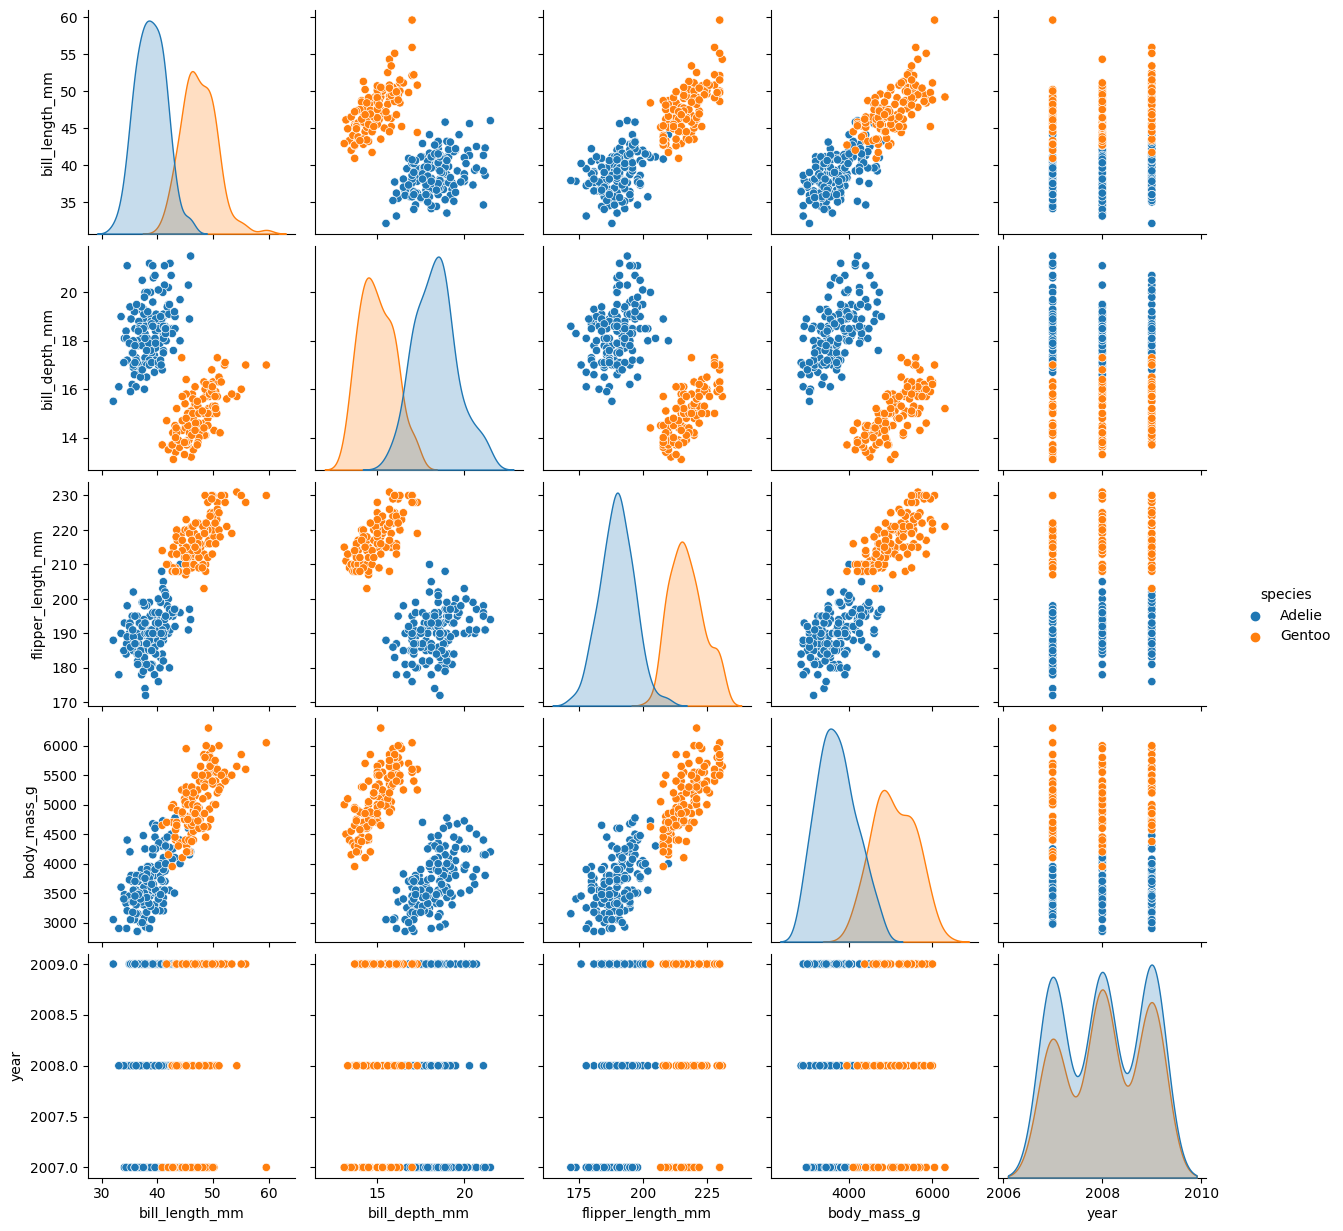

In [22]:
sns.pairplot(data=df,hue="species")

In [23]:
from sklearn.preprocessing import LabelEncoder
# used to convert the categorical features data into numerical type

In [25]:
encoder = LabelEncoder()

df["species"] = encoder.fit_transform(df['species'])
df['island'] = encoder.fit_transform(df['island'])

In [27]:
df[["species"]].value_counts()

# 0 --> Adielle
# 1 --> Gentoo

species
0          151
1          123
dtype: int64

In [29]:
df[['island']]

,island
0,2
1,2
2,2
3,2
4,2
...,...
269,0
270,0
271,0
272,0


In [30]:
# it should not have multicolliearity
df.corr()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
species,1.000000,-0.662893,0.835687,-0.832606,0.901796,0.819837,0.032942
island,-0.662893,1.000000,-0.553917,0.559274,-0.562413,-0.544047,-0.074625
bill_length_mm,0.835687,-0.553917,1.000000,-0.546050,0.869026,0.876905,0.086799
bill_depth_mm,-0.832606,0.559274,-0.546050,1.000000,-0.640141,-0.483223,-0.051973
flipper_length_mm,0.901796,-0.562413,0.869026,-0.640141,1.000000,0.882262,0.150004
body_mass_g,0.819837,-0.544047,0.876905,-0.483223,0.882262,1.000000,0.034148
year,0.032942,-0.074625,0.086799,-0.051973,0.150004,0.034148,1.000000


<Axes: >

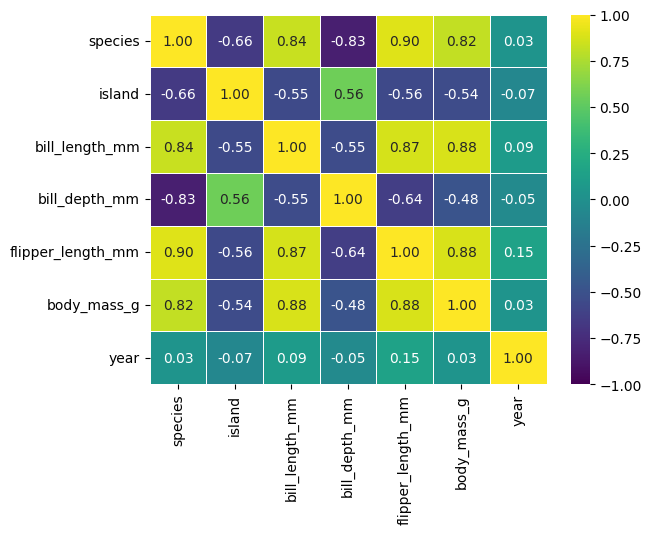

In [47]:
sns.heatmap(data=df.corr(),annot=True,cmap="viridis",linewidths=0.5,linecolor='white',vmin=-1,vmax=1,fmt='.2f')

In [64]:
# input adn output:
X = df.iloc[:,1:]
X[:2]

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,2,39.1,18.7,181.0,3750.0,2007
1,2,39.5,17.4,186.0,3800.0,2007


In [68]:
y = df['species']
y[:2]

0    0
1    0
Name: species, dtype: int64

## Build a machine model to predict the species of Palmer Penguins

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model = LogisticRegression()
model

LogisticRegression()

In [59]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8) # 80% data will be train and remaining 20 % will test

In [71]:
model.fit(x_train,y_train)

LogisticRegression()

In [72]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [74]:
# actual data:
y_test[:2]

0     0
17    0
Name: species, dtype: int64

In [75]:
x_test[:2]

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,2,39.1,18.7,181.0,3750.0,2007
17,2,34.4,18.4,184.0,3325.0,2007


<Axes: xlabel='bill_length_mm', ylabel='species'>

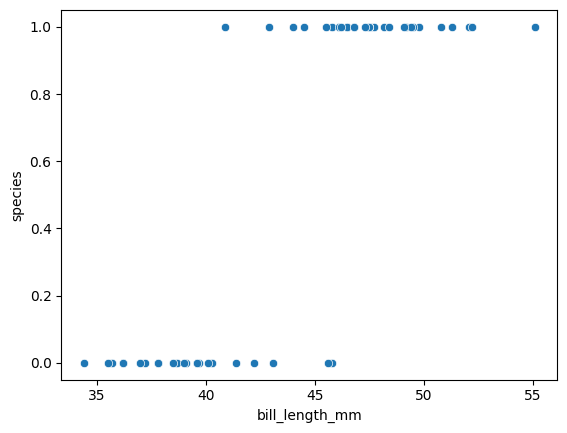

In [82]:
sns.scatterplot(data=x_test,x=x_test.bill_length_mm,y=y)

In [85]:
chk = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
chk[:2]

,Actual,Predicted
0,0,0
17,0,0


<Axes: >

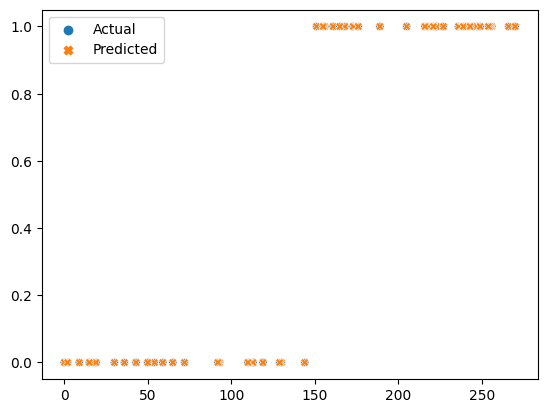

In [87]:
sns.scatterplot(data=chk)

In [88]:
# Data Accuracy:
model.score(X,y)*100

100.0

In [89]:
model.score(x_train,y_train)

1.0

In [90]:
# lets check the performance measure / metrics:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [91]:
# Accuracy:
accuracy_score(y_test,y_pred)

1.0

In [93]:
# confusion_matrix:
confusion_matrix(y_test,y_pred)
# True Positive : 23
# True Negative : 32

array([[23,  0],
       [ 0, 32]])

In [92]:
# precision:
precision_score(y_test,y_pred)

1.0

In [94]:
# recall:
recall_score(y_test,y_pred)

1.0

In [96]:
f1_score(y_test,y_pred)*100

100.0